<h1 style="border: 1px solid black; border-radius: 20px; text-align: center; padding : 10px;">
    
    Élégance et Stratégie : Maximiser les Conversions de Clients Passifs en Prêts Personnels

</h1>


# Context 

Ce dossier concerne une banque (Thera Bank) qui possède une clientèle croissante. La majorité de ces clients sont des clients passifs (déposants) avec des montants de dépôts variables. Le nombre de clients emprunteurs (actifs) est assez faible, et la banque souhaite développer cette base rapidement pour attirer plus d'activités de prêt et ainsi, générer davantage de revenus grâce aux intérêts sur les prêts. En particulier, la direction souhaite explorer des moyens de convertir ses clients passifs en clients de prêts personnels (tout en les conservant en tant que déposants). Une campagne menée par la banque l'année dernière auprès des clients passifs a montré un taux de conversion sain de plus de 9% de réussite. Cela a encouragé le département du marketing de détail à concevoir des campagnes pour cibler mieux le marketing afin d'augmenter le taux de réussite avec un budget minimal.

Le département souhaite construire un modèle qui les aidera à identifier les clients potentiels ayant une probabilité plus élevée d'acheter le prêt. Cela augmentera le taux de réussite tout en réduisant le coût de la campagne.

dataset source : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

# 1 Importation

In [1]:
## 1.1 Importation des bibliotheques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# On verifier que les bibliotheques sont importes
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


## 1.2 Importation des donnees 

In [4]:
df = pd.read_csv('bank_personal_loan.csv', delimiter=';')

In [5]:
df.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1149,1150,56,32,158,91763,1,7.4,1,0,0,0,0,0,0


## 1.3 Dictionnaire de dataset

- **Customer ID** : Numéro d'identification unique attribué à chaque client.
- **Age** : Âge du client en années complètes.
- **Experience** : Nombre d'années d'expérience professionnelle.
- **Income** : Revenu annuel du client en milliers de dollars.
- **ZIPCode** : Code postal de l'adresse domicile du client.
- **Family** : Nombre de membres dans la famille du client.
- **CCAvg** : Dépense mensuelle moyenne sur les cartes de crédit en milliers de dollars.
- **Education** : Niveau d'éducation atteint par le client. (1 : Licence ; 2 : Diplômé ; 3 : Avancé/Professionnel)
- **Mortgage** : Valeur de l'hypothèque de la maison du client, le cas échéant, en milliers de dollars.
- **Personal Loan** : Indique si le client a accepté le prêt personnel proposé lors de la dernière campagne. (Oui/Non)
- **Securities Account** : Indique si le client possède un compte de valeurs mobilières auprès de la banque. (Oui/Non)
- **CD Account** : Indique si le client possède un compte de dépôt à terme (CD) auprès de la banque. (Oui/Non)
- **Online** : Indique si le client utilise les services de banque en ligne. (Oui/Non)
- **CreditCard** : Indique si le client utilise une carte de crédit émise par UniversalBank. (Oui/Non)

## 1.4 Parametres global

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# 2. Etude des donnees 

## 2.1 df.head(), df.tail() et df.sample()

La commande df.head() permet de recuperer par default les 5 premiers lignes, si on veut recuperer les n derniers lignes, on utilise la commande df.tail(n) 

La commande sample() permet de recuperer par default un example aleatoire de notre dataset, on peut aussi specifier le nombre des observations a recuperer 

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.sample(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1478,1479,65,39,160,94803,4,3.8,1,237,1,0,0,1,0
2837,2838,39,14,54,92037,2,1.1,2,159,0,0,0,0,1
4323,4324,52,28,31,92008,4,0.9,2,151,0,1,0,1,0


## 2.2 Structure des nos donnees 

La commande df.info() nous permet de s'informer de la structure generale de notre dataset, parmit les informations on a:
- Les types des donnees.
- Nombres des colonnes.
- Nombres des valuers manquants pour chaque colonnes.
- Nombre des lignes en total

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Les remarques les plus importantes depuis cette fonction `info()`
- Le DataFrame contient un total de 5000 entrées.
- Il y a 14 colonnes au total.
- Aucune des colonnes ne contient de valeurs nulles (non-null count est de 5000 pour toutes les colonnes), ce qui signifie qu'il n'y a pas de données manquantes dans le jeu de données.
- Les types de données des colonnes sont les suivants :
  - Les colonnes ID, Age, Experience, Income, ZIP Code, Family, Mortgage, Personal Loan, Securities Account, CD Account, Online et CreditCard sont de type entier (int64).
  - La colonne CCAvg est de type flottant (float64).

## 2.3 Donnees manquantes 

La fonction `isna()` est utilisée pour vérifier chaque élément du DataFrame et renvoie un DataFrame de la même forme, mais avec des valeurs booléennes indiquant True là où les valeurs sont NaN (Not a Number) et False là où les valeurs sont non-NaN.

Ensuite, la fonction `sum()` est appliquée à ce DataFrame résultant. Lorsque vous appelez `sum()` sur un DataFrame de valeurs booléennes, chaque valeur True est interprétée comme 1 et chaque valeur False est interprétée comme 0. Ainsi, `sum()` retourne la somme de ces valeurs, indiquant le nombre total de valeurs True pour chaque colonne.

In [11]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

La sortie de `df.isna().sum()` indique le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame. Dans ce cas précis :

- La colonne "ID" n'a aucune valeur manquante.
- De même, aucune des autres colonnes (`Age`, `Experience`, `Income`, `ZIP Code`, `Family`, `CCAvg`, `Education`, `Mortgage`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, `CreditCard`) n'a de valeurs manquantes.

Cela suggère que le jeu de données est complet, sans aucune valeur manquante dans toutes les colonnes.

## 2.4 Donnees dupliquer

La commande df.duplicated().sum() permet de calculer le nombre des entrees dupliquer dans notre dataset.

In [12]:
df.duplicated().sum()

0

    Cela suggere qu'on a aucun observation dupliquer dans notre dataset

# 3. Visualisation

La visualisation des données est cruciale pour comprendre la distribution et les relations entre les variables. Elle permet d'identifier des tendances et des corrélations, souvent invisibles dans les données brutes. La communication des découvertes est également facilitée par des graphiques et des diagrammes, permettant des décisions éclairées et des stratégies fondées sur une compréhension approfondie des données.


## 3.1 Répartition des tranches d'âge

In [13]:
# Creation d'une fonctions pour creer des tranches des ages
def age_tranche(df, decalage=10):
    '''
    Les tranches sont réparties selon un décalage de 10 ans par défaut
    '''
    # Calcul du nombre de tranches en fonction de l'âge maximal dans le DataFrame
    nb_tranches = int(np.ceil(df['Age'].max() / decalage))
    
    # Création d'un tableau d'entiers pour stocker le nombre d'âges dans chaque tranche
    tranches = np.zeros(nb_tranches, dtype=int)
    
    # Calcul du nombre d'âges dans chaque tranche
    for age in df['Age']:
        tranche_index = int(age / decalage)  # Calcul de l'indice de la tranche
        tranches[tranche_index] += 1         # Incrémentation du nombre d'âges dans la tranche
    
    return tranches

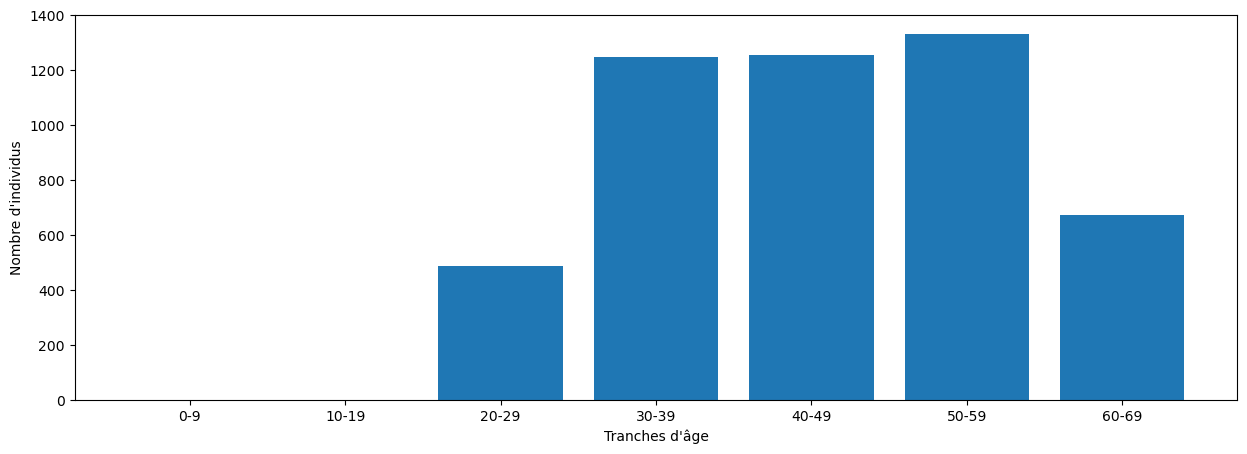

In [14]:
ages = age_tranche(df)

# Tracé de l'histogramme
plt.figure(figsize=(15, 5))
plt.bar(range(len(ages)), ages)

plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'individus')

plt.xticks(range(len(ages)), [f'{i*10}-{(i+1)*10-1}' for i in range(len(ages))])

# Affichage du graphique
plt.show()


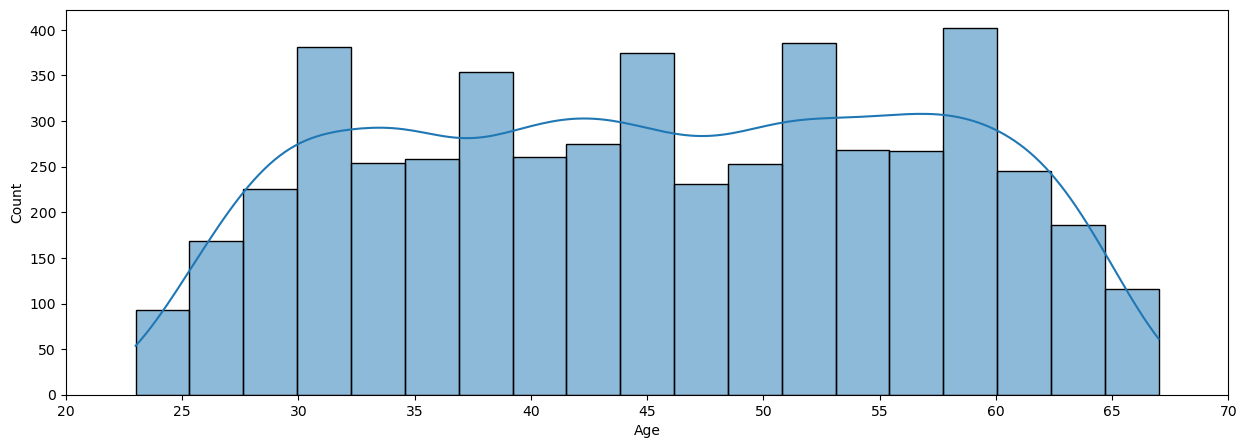

In [15]:
plt.figure(figsize = (15,5) ) 

sns.histplot(data = df , x = 'Age', kde=True)
plt.xticks(range(20,71,5))
plt.show()

<i>Remarques</i>
1. Les deux premiers groupes d'âge ne contiennent aucun individu (compte de 0). Cela suggère qu'il n'y a aucun individu dans le jeu de données dans la plage d'âge couverte par ces groupes.

2. Les groupes d'âge avec les comptes les plus élevés sont ceux correspondant aux âges de 20 à 29 ans, 30 à 39 ans et 40 à 49 ans. Cela indique que le jeu de données contient un nombre significatif d'individus dans ces tranches d'âge.

3. Les comptes diminuent progressivement à mesure que l'âge augmente au-delà de 40-49 ans. Cela est attendu car les gens ont tendance à prendre leur retraite ou à être moins représentés dans les groupes d'âge plus avancés.

4. On observe une légère augmentation à nouveau dans le compte pour le dernier groupe d'âge (70 à 79 ans). Cela pourrait être dû à des individus qui vivent plus longtemps ou qui restent actifs à un âge avancé.

5. Dans l'ensemble, la distribution semble être inclinée vers les groupes d'âge plus jeunes, avec une diminution des comptes pour les groupes d'âge plus âgés, ce qui est une tendance démographique courante dans de nombreuses populations.

## 3.2 Distribution des clients selon leur revenu

In [16]:
# determination des tranches des revenu
def income_tranche(df, decalage = 10):
    nb_tranches = int( np.ceil( df['Income'].max() / decalage) )
    tranches = np.zeros(nb_tranches , dtype = int)
    for income in df['Income']:
        tranche_index = int( income / decalage ) 
        tranches[tranche_index] += 1
    return tranches

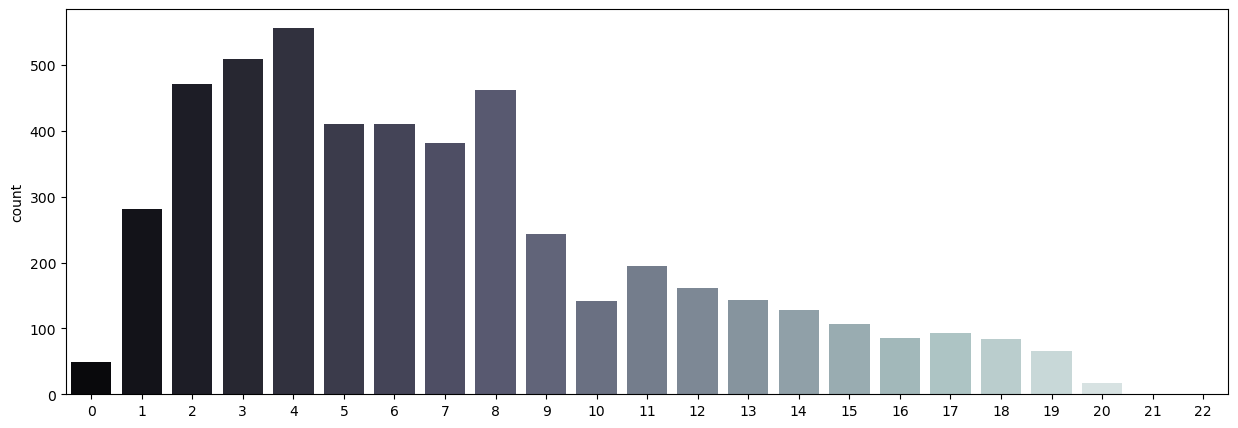

In [17]:
income = income_tranche(df)

income_df = pd.DataFrame({'count': income})

plt.figure(figsize = (15,5) )

sns.barplot(data = income_df, x =income_df.index , y = 'count', palette = palettes[13])

plt.yscale('linear')

plt.show()

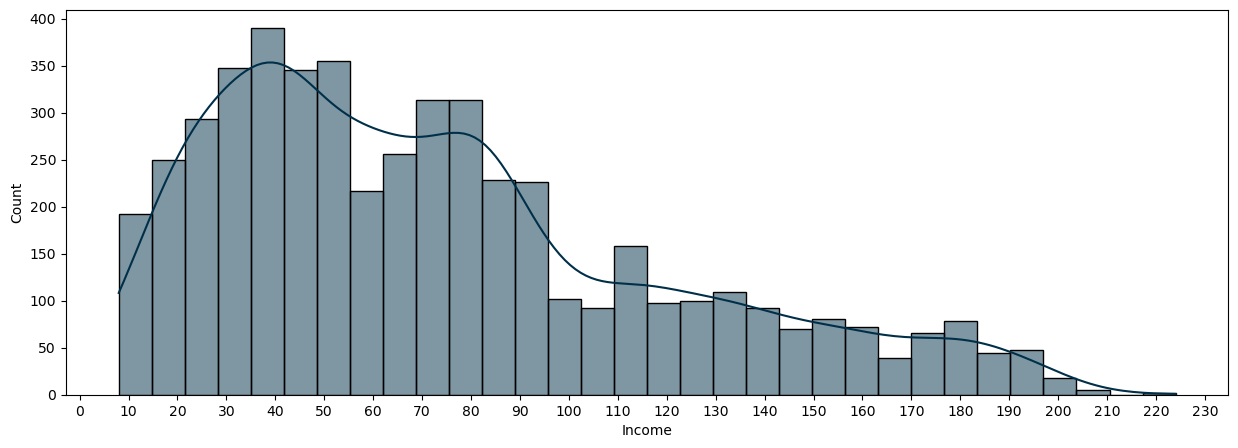

In [18]:
plt.figure(figsize = (15,5))

sns.histplot(data = df , x = 'Income', kde = True, color = colors[0])
plt.xticks(range(0,231,10))
plt.show()

<i>Remarques : </i>
    En analysant la distribution des revenus des clients avec un décalage de 10 (revenu annuel du client en milliers de dollars), voici quelques observations :

1. Le nombre le plus élevé de clients se situe dans les tranches de revenu de 40k à 50k, 50k à 60k et 60k à 70k. Cela suggère que la majorité des clients ont un revenu annuel compris entre 40 000 et 70 000 dollars.

2. Le nombre de clients diminue progressivement à mesure que le revenu augmente au-delà de 70k. Cela indique qu'il y a moins de clients avec des revenus plus élevés.

3. Il y a très peu de clients dans les tranches de revenu les plus élevées, comme ceux au-dessus de 90k. Cela suggère qu'il y a une proportion relativement faible de clients à revenu élevé dans l'échantillon de données.

4. Il y a une tranche de revenu avec seulement 17 clients et une autre avec seulement 1 client, ce qui indique des groupes de revenus moins représentés dans l'échantillon.

5. Dans l'ensemble, la distribution des revenus semble être biaisée vers des revenus modérés à moyens, avec relativement peu de clients dans les tranches de revenus les plus élevées. Cela peut avoir des implications pour la segmentation de la clientèle et les stratégies de marketing ciblées.

## 3.3 Localisation des clients

In [19]:
len(df['ZIP Code'].unique())

467

On remarque qu'il existe uniquement `467 ZIP Code unique` dans notre data, tandis qu'ont a collecter des informations a propos de 5000 clients.
On deduit qui les clients partage leur enviromenent.

In [20]:
zip_code_grouped = df.groupby('ZIP Code').size()

zip_code_df = pd.DataFrame({'count': zip_code_grouped}).reset_index()
zip_code_df

,ZIP Code,count
0,9307,1
1,90005,5
2,90007,6
3,90009,8
4,90011,3
...,...,...
462,96091,4
463,96094,2
464,96145,1
465,96150,4


On remarque qu'il existe un code postal tres different des autres, ce qui rendre la visualisation en peu etoiler vers les extermites. Donc on doit eliminer cette observation de notre visualisation pour qu'on a une vision claire de nos donnees.

In [21]:
zip_code_df = zip_code_df.drop(zip_code_df[zip_code_df['ZIP Code'] == 9307].index)

In [22]:
zip_code_df

,ZIP Code,count
1,90005,5
2,90007,6
3,90009,8
4,90011,3
5,90016,2
...,...,...
462,96091,4
463,96094,2
464,96145,1
465,96150,4


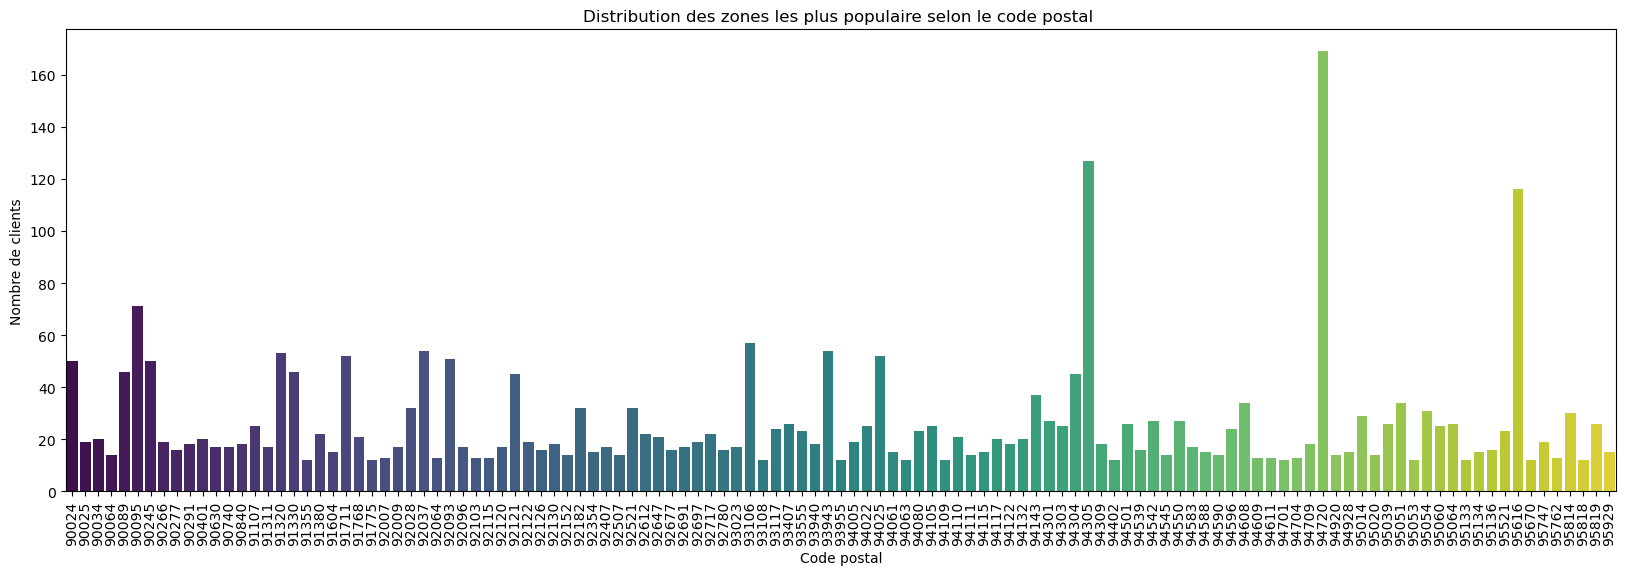

In [23]:
# Tracer le graphique à barres
plt.figure(figsize=(20, 6))

sns.barplot(data = zip_code_df[zip_code_df['count'] > 
                               round(zip_code_df['count'].mean())], 
            x='ZIP Code', 
            y='count', 
            palette='viridis'
           )

plt.xlabel('Code postal')
plt.ylabel('Nombre de clients')
plt.title('Distribution des zones les plus populaire selon le code postal ')
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

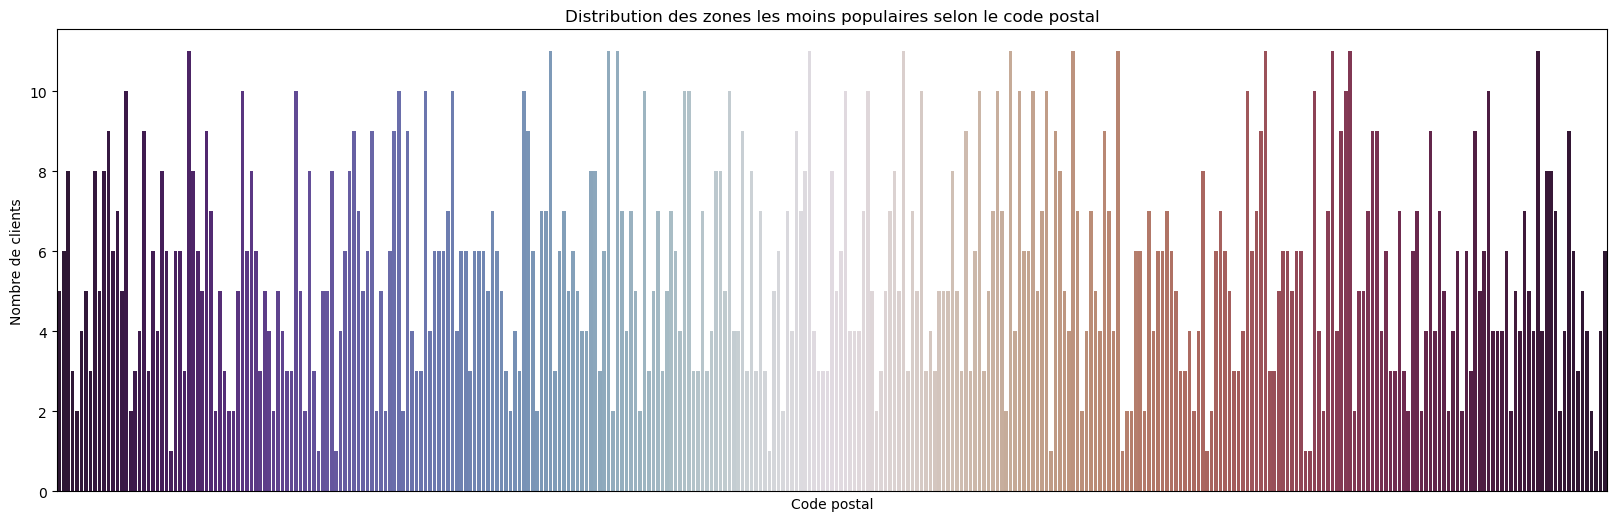

In [24]:
# Tracer le graphique à barres
plt.figure(figsize=(20, 6))


# Utiliser sns.barplot avec les données triées et filtrées
sns.barplot(data=zip_code_df[zip_code_df['count'] <= round(zip_code_df['count'].mean())], 
            y='count', 
            x='ZIP Code', 
            palette=palettes[5]
           )

# Ajouter des étiquettes et un titre
plt.xlabel('Code postal')
plt.ylabel('Nombre de clients')
plt.title('Distribution des zones les moins populaires selon le code postal')

plt.xticks([])
plt.show()

In [25]:
zip_code_grouped.sort_values(ascending=False, inplace = True)

In [26]:
zip_code_grouped.head(10)

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
dtype: int64

In [27]:
zip_code_grouped.sort_values(ascending = False).tail(10)

ZIP Code
90068    1
94404    1
90813    1
94087    1
92694    1
94970    1
94965    1
94598    1
96145    1
9307     1
dtype: int64

<i>Remarques</i>

- On constate que les 3 zones qui marquent une concentration forte des clients sont les zones avec les codes postaux : 94770, 94305 et 95616, respectivement.
- Les 10 principaux codes postaux selon la concentration des clients sont : 94720, 94305, 95616, 90095, 93106, 92037, 93943, 91320, 94025 et 91711.

## 3.4 Taille de famille 

In [28]:
df['Family'].unique()

array([4, 3, 1, 2])

In [29]:
famille_group = df.groupby('Family').size()
famille_group = pd.DataFrame({'count': famille_group}).reset_index()
famille_group.set_index(keys = 'Family')

,count
Family,
1,1472
2,1296
3,1010
4,1222


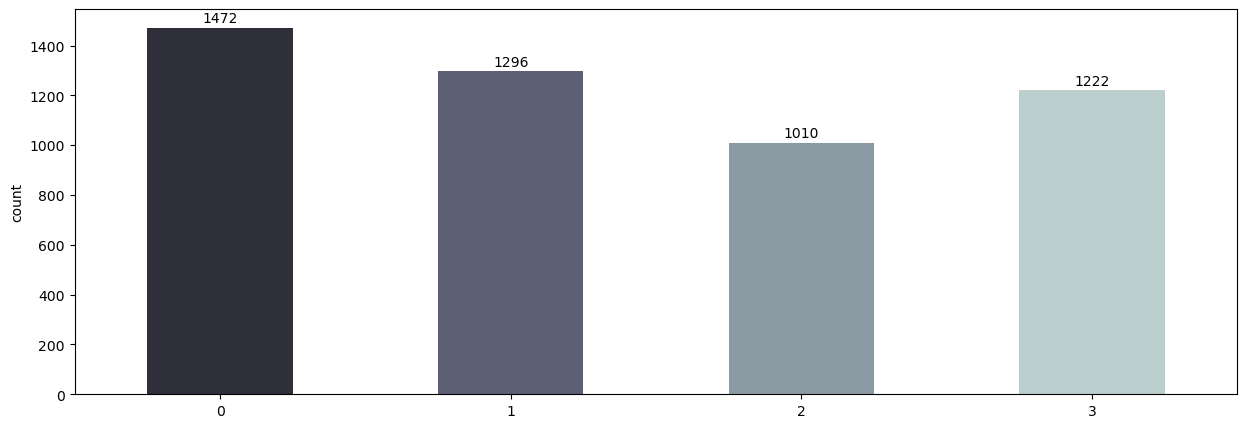

In [30]:
plt.figure(figsize=(15, 5))

sns.barplot(data=famille_group, y='count', x=famille_group.index, palette=palettes[13], width=0.5)

for index, value in enumerate(famille_group['count']):
    plt.text(index, value + 20, str(value), ha='center', fontsize=10)

plt.show()

À partir du tableau des tailles de famille que vous avez fourni :

1. Il y a 1472 familles de taille 1.
2. Il y a 1296 familles de taille 2.
3. Il y a 1010 familles de taille 3.
4. Il y a 1222 familles de taille 4.

En analysant ces données, on peut conclure que :

- La majorité des familles dans l'échantillon ont une taille de 1 ou 2.
- Les familles de taille 3 sont moins nombreuses que les familles de taille 1 ou 2, mais elles restent assez représentées.
- Les familles de taille 4 sont également assez courantes, bien qu'elles soient légèrement moins nombreuses que les familles de taille 1 ou 2.

# 4. Statistiques

## 4.1 Statistiques multivariant

### 4.1.1 Depense mensuelle selon l'age des clients

In [31]:
age_ccavg = df[subset := ['Age', 'CCAvg']]

In [32]:
age_ccavg.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0


- Pour la colonne « Age » :
  - Nous avons un échantillon de 5000 individus.
  - L'âge moyen est d'environ 45,34 ans.
  - L'écart-type est d'environ 11,46 ans, illustrant la dispersion des âges autour de la moyenne.
  - L'âge minimum est de 23 ans et l'âge maximum est de 67 ans.
  - Le premier quartile (Q1) se situe à 35 ans, indiquant que 25 % des individus ont un âge inférieur à cette valeur.
  - La médiane (Q2) est de 45 ans, ce qui signifie que 50 % des individus ont un âge inférieur à cette valeur.
  - Le troisième quartile (Q3) se situe à 55 ans, ce qui implique que 75 % des individus ont un âge inférieur à cette valeur.

- Pour la colonne « CCAvg » (dépenses moyennes sur cartes de crédit par mois) :
  - Nous avons également un échantillon de 5000 individus.
  - La dépense moyenne sur cartes de crédit par mois est d'environ 1,94M \$. 
  - L'écart-type est d'environ 1,75M \$, reflétant la dispersion des dépenses autour de la moyenne.
  - La dépense minimale est de 0,00 \$, suggérant que certains clients ne dépensent rien sur leurs cartes de crédit.
  - La dépense maximale est de 10,00M \$, illustrant les dépenses mensuelles les plus élevées observées.
  - Le premier quartile (Q1) se situe à 0,70M \$, ce qui signifie que 25 % des individus ont une dépense mensuelle inférieure à cette valeur.
  - La médiane (Q2) est de 1,50M \$, indiquant que 50 % des individus ont une dépense mensuelle inférieure à cette valeur.
  - Le troisième quartile (Q3) se situe à 2,50M \$, ce qui implique que 75 % des individus ont une dépense mensuelle inférieure à cette valeur.

Ces statistiques offrent un aperçu de la distribution et de la tendance centrale des colonnes « Age » et « CCAvg » dans votre jeu de données.

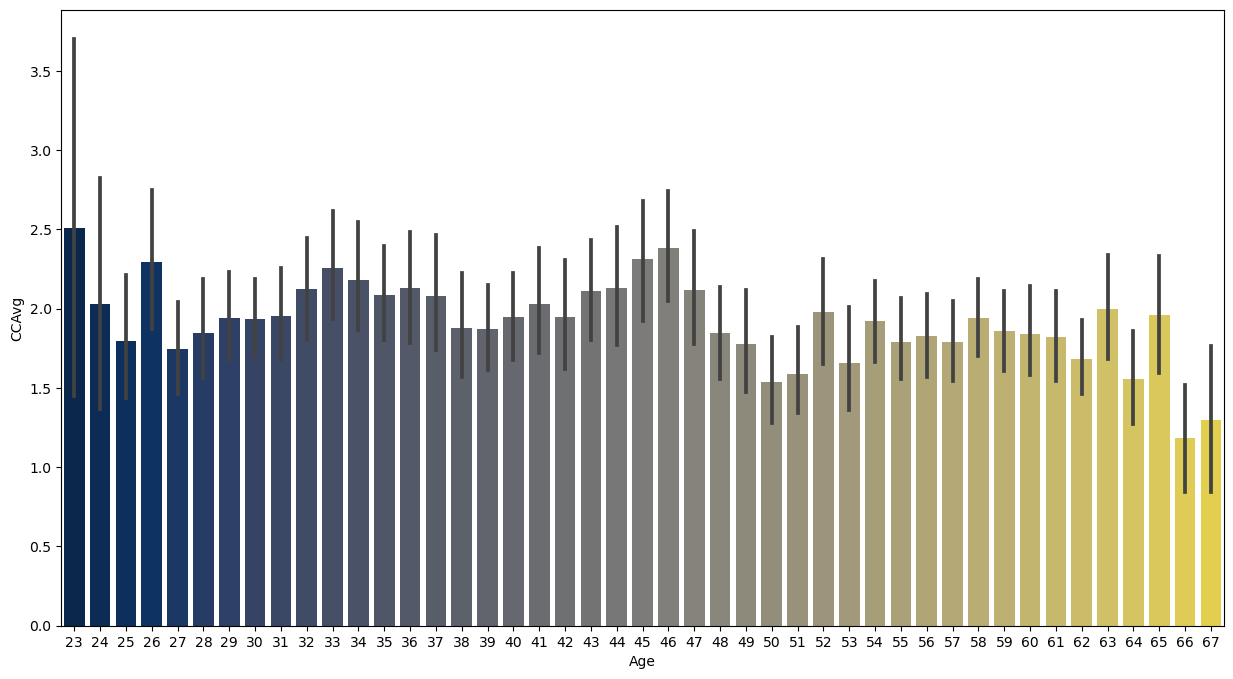

In [33]:
plt.figure(figsize = (15,8))

sns.barplot(data = age_ccavg, y = 'CCAvg', x = 'Age' ,palette=palettes[8])

plt.show()

In [34]:
def age_ccavg_tranche(dataset, decalage=10):
    """
    Détermine les dépenses mensuelles selon les tranches d'âge.

    Args:
    - dataset: DataFrame contenant les données d'âge et de dépenses mensuelles.
    - decalage: Interval utilisé pour définir les tranches d'âge. Par défaut, 10.

    Returns:
    - Liste de listes contenant les informations agrégées pour chaque tranche d'âge:
      [[nb_individu, sum_age, sum_ccavg], [,,], [,,], ...]
    """
    # Calculer le nombre de tranches
    nb_tranches = int(np.ceil(dataset['Age'].max() / decalage))
    
    # Initialiser la liste de tranches avec des zéros
    tranches = [[0, 0, 0] for _ in range(nb_tranches)]

    # Itérer à travers chaque ligne du jeu de données
    for _, row in dataset.iterrows():
        # Calculer l'index de tranche d'âge
        tranche_index = int(row['Age'] / decalage)
        
        # Mettre à jour les valeurs de la tranche
        tranches[tranche_index][0] += 1
        tranches[tranche_index][1] += row['Age']
        tranches[tranche_index][2] += row['CCAvg']

    # Calculer les moyennes pour les tranches non vides
    for _ in tranches:
        if _[0] != 0:
            _[1] = round(_[1] / _[0], 2)
            _[2] = round(_[2] / _[0], 2)

    return tranches, nb_tranches

In [35]:
age_ccavg_df, nb_tranche = age_ccavg_tranche(age_ccavg)

age_ccavg_df = pd.DataFrame(age_ccavg_df, columns=['nb_individu', 'age', 'ccavg'])

display(age_ccavg_df.T)

,0,1,2,3,4,5,6
nb_individu,0.0,0.0,488.00,1247.00,1257.00,1334.00,674.00
age,0.0,0.0,27.07,34.42,44.36,54.51,62.42
ccavg,0.0,0.0,1.94,2.05,2.06,1.79,1.78


    les tranhes sont reparties par default avec un decalage de 10 ans 

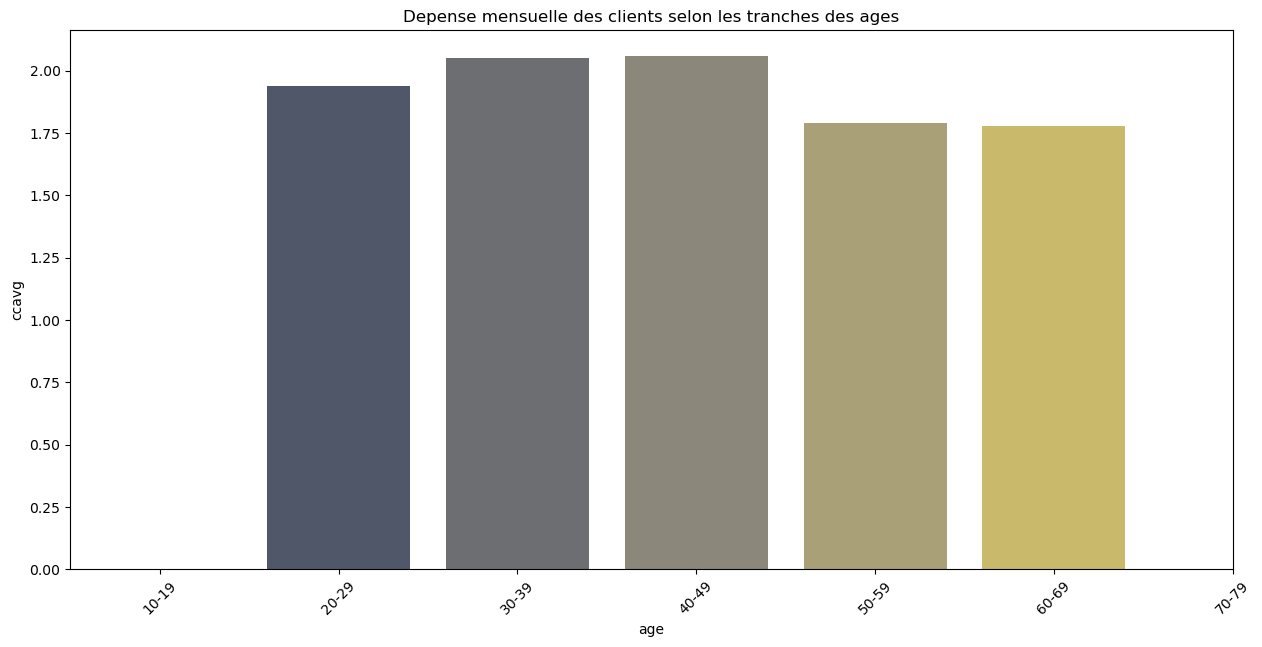

In [36]:
plt.figure(figsize=(15, 7))

# Plot the barplot
sns.barplot(data=age_ccavg_df, x='age', y='ccavg', palette=palettes[8])

plt.xticks(range(nb_tranche), [f'{(i+1)*10}-{(i+2)*10-1}' for i in range(nb_tranche)], rotation=45)

# Set the y-scale to linear
plt.yscale('linear')
plt.title('Depense mensuelle des clients selon les tranches des ages')
# Show the plot
plt.show()

<i>Remarques</i>
- Les deux premières tranches d'âge ont un nombre d'individus nul (0), ce qui indique qu'il n'y a aucun individu dans ces tranches d'âge.
- À partir de la troisième tranche d'âge, le nombre d'individus augmente progressivement, avec des pics observés dans les tranches d'âge les plus courantes, notamment dans les tranches d'âge de 35 à 44 ans.
- La moyenne d'âge varie de 27,07 ans dans la tranche d'âge la plus jeune à 62,42 ans dans la tranche d'âge la plus âgée.
- Les dépenses mensuelles moyennes sur les cartes de crédit varient de `1,78`\$ a `2,06`\$ mille, avec une légère baisse observée dans les tranches d'âge les plus âgées.

Ces remarques mettent en évidence les tendances générales de la répartition des individus en fonction de l'âge et des dépenses mensuelles moyennes sur les cartes de crédit.

### 4.1.2 Distribution des clients avec un pret personel selon leurs ages

In [37]:
loan_age = df[subset := ['Personal Loan', 'Age', 'ID']].set_index(keys = 'ID')
loan_age.head(30).T

ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Personal Loan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
Age,25,45,39,35,35,37,53,50,35,34,65,29,48,59,67,60,38,42,46,55,56,57,29,44,36,43,40,46,56,38


In [38]:
loan_age.describe().T

,count,mean,std,min,25%,50%,75%,max
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0



<i>Remarques</i>
- Pour la variable "Personal Loan" :
  - La moyenne est d'environ 0,096, ce qui suggère qu'en moyenne, environ 9,6 % des clients ont souscrit à un prêt personnel.
  - L'écart-type est d'environ 0,295, indiquant une dispersion des données autour de la moyenne.
  - La valeur minimale est de 0, ce qui signifie qu'il y a des clients qui n'ont pas souscrit à un prêt personnel.
  - Les quartiles montrent que 75 % des clients n'ont pas souscrit à un prêt personnel.

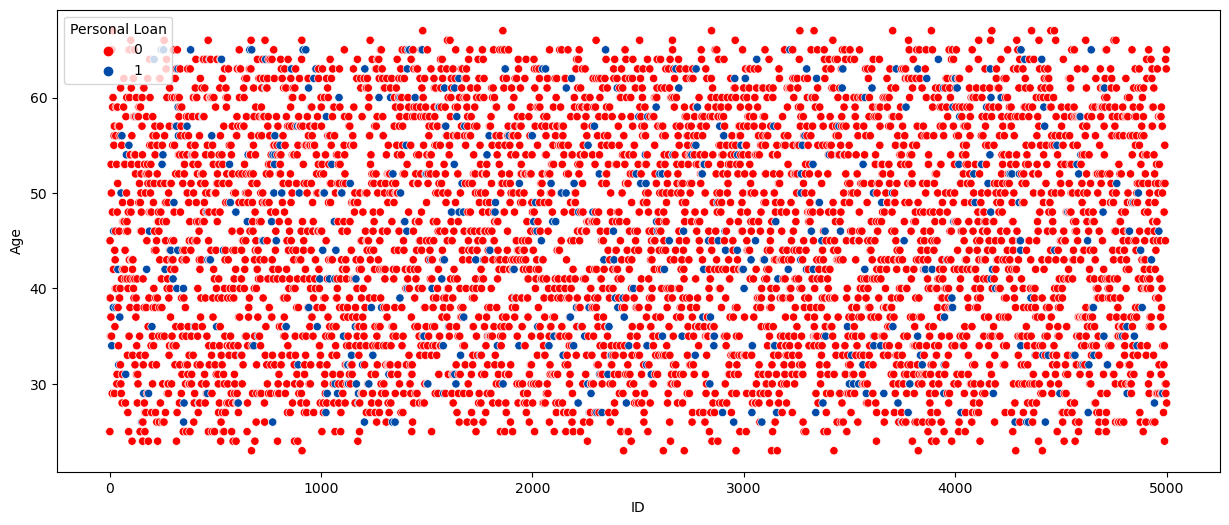

In [39]:
plt.figure(figsize = (15,6))

sns.scatterplot(data = loan_age, x = loan_age.index , y = 'Age', hue = 'Personal Loan', palette = ['red', '#004BA8'])

plt.show()

In [40]:
def age_pret_tranche(dataset, decalage=10):
    """
    Calcule la répartition des clients en fonction de leur âge et de leur souscription à un prêt personnel,
    en utilisant des tranches d'âge avec un intervalle spécifié.

    Args:
        dataset (DataFrame): Le DataFrame contenant les données des clients, y compris l'âge et la souscription au prêt personnel.
        decalage (int, optional): L'intervalle pour diviser les tranches d'âge. Par défaut, 10.

    Returns:
        tuple: Un tuple contenant deux éléments :
               - Une liste de listes représentant le nombre de clients dans chaque tranche d'âge avec et sans prêt personnel.
               - Le nombre total de tranches d'âge.
    """
    # Calculer le nombre de tranches
    nb_tranches = int(np.ceil(dataset['Age'].max() / decalage))
    
    # Initialiser la liste de tranches avec des zéros
    tranches = [[0, 0] for _ in range(nb_tranches)]

    # Itérer à travers chaque ligne du jeu de données
    for _, row in dataset.iterrows():
        # Calculer l'index de tranche d'âge
        tranche_index = int(row['Age'] / decalage)
        
        # Mettre à jour les valeurs de la tranche
        if row['Personal Loan'] == 0:
            tranches[tranche_index][0] += 1
        else:
            tranches[tranche_index][1] += 1

    return tranches, nb_tranches


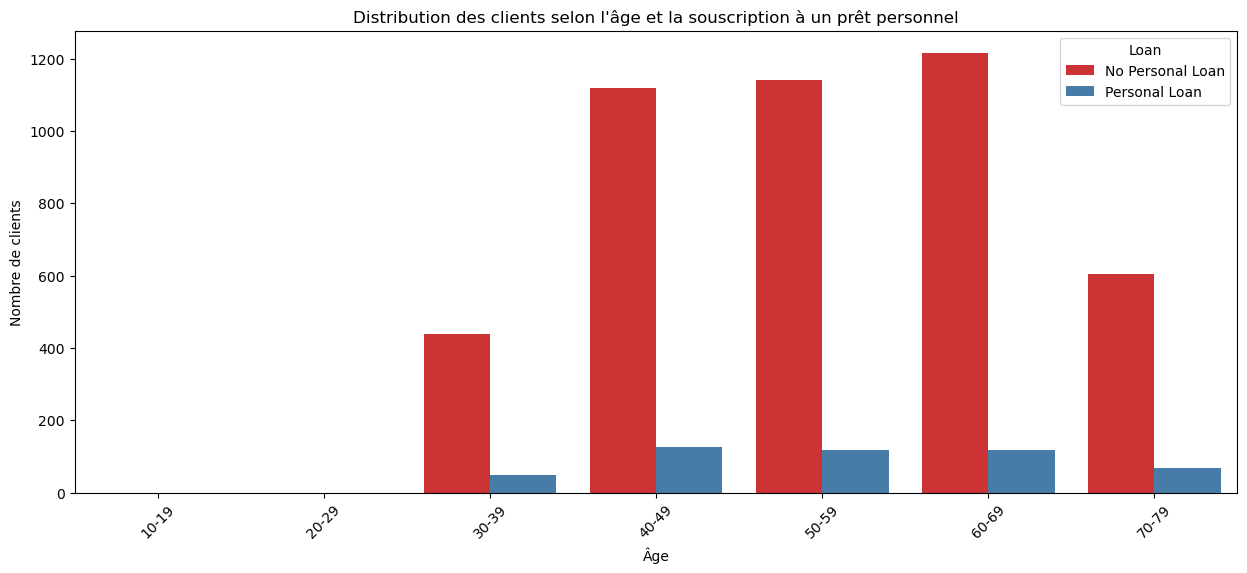

In [41]:
age_pret_data, nb_tranches = age_pret_tranche(loan_age)
age_pret_df = pd.DataFrame(age_pret_data, columns=['No Personal Loan', 'Personal Loan'])

age_pret_df['Age'] = [(i * 10) - 1 for i in range(1, nb_tranches + 1)]

# Melt le DataFrame pour le format long
age_pret_df_melted = age_pret_df.melt(id_vars='Age', var_name='Loan', value_name='Count')

# Tracer le graphique à barres
plt.figure(figsize=(15, 6))

# Tracer le graphique à barres
barplot = sns.barplot(data=age_pret_df_melted, x='Age', y='Count', hue='Loan', palette='Set1')

plt.title('Distribution des clients selon l\'âge et la souscription à un prêt personnel')
plt.xticks(range(nb_tranches), [f'{(i+1)*10}-{(i+2)*10-1}' for i in range(nb_tranches)], rotation=45)
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

- Les deux premières tranches d'âge ont un nombre nul de clients ayant souscrit à un prêt personnel, ce qui signifie qu'aucun client dans ces tranches d'âge n'a souscrit à un prêt personnel.
- À partir de la troisième tranche d'âge, on observe une augmentation du nombre de clients ayant souscrit à un prêt personnel, avec des pics dans les tranches d'âge les plus courantes.
- Les tranches d'âge les plus représentées sont celles de 35 à 44 ans, avec 1120 clients n'ayant pas souscrit à un prêt personnel et 127 clients ayant souscrit à un prêt personnel.
- Globalement, il semble y avoir plus de clients n'ayant pas souscrit à un prêt personnel que de clients ayant souscrit à un prêt personnel dans chaque tranche d'âge, bien que le nombre de clients ayant souscrit à un prêt personnel varie selon l'âge.

Ces remarques mettent en évidence la relation entre l'âge des clients et leur propension à souscrire à un prêt personnel dans votre ensemble de données.

### 4.1.3 Le revenu mensuelle et la depot mensuelle des clients 

In [42]:
revenu_depot = df[subset := ['Income', 'CCAvg', 'Personal Loan']]
revenu_depot.head(25).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Income,49.0,34.0,11.0,100.0,45.0,29.0,72.0,22.0,81.0,180.0,105.0,45.0,114.0,40.0,112.0,22.0,130.0,81.0,193.0,21.0,25.0,63.0,62.0,43.0,152.0
CCAvg,1.6,1.5,1.0,2.7,1.0,0.4,1.5,0.3,0.6,8.9,2.4,0.1,3.8,2.5,2.0,1.5,4.7,2.4,8.1,0.5,0.9,2.0,1.2,0.7,3.9
Personal Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
revenu_depot.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


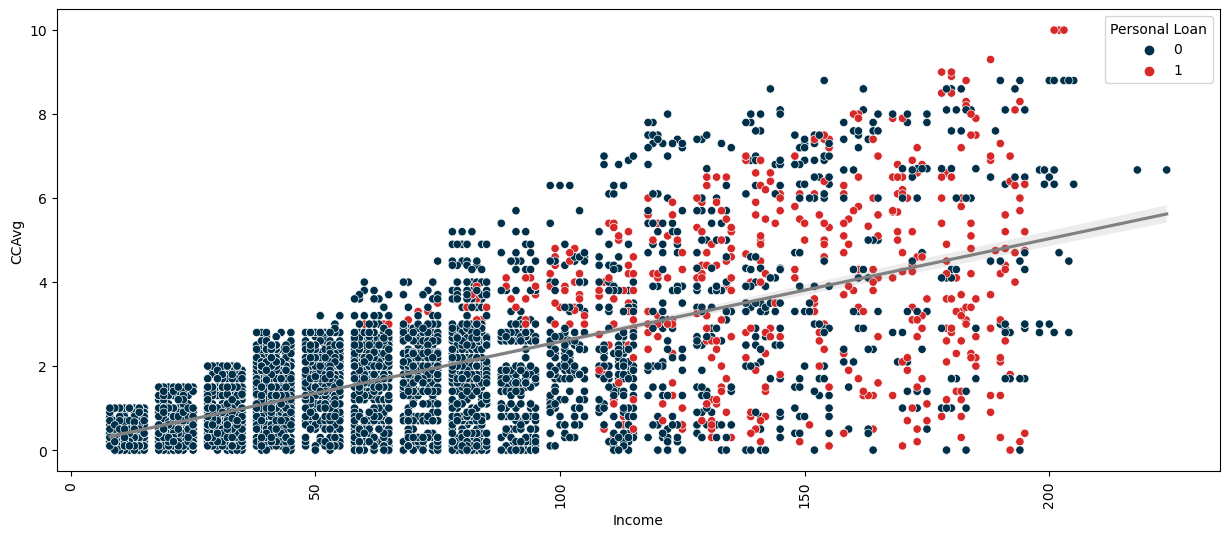

In [44]:
plt.figure(figsize = (15,6))

sns.scatterplot(data = revenu_depot, x = 'Income', y = 'CCAvg', hue = 'Personal Loan', palette = colors)

sns.regplot(data = revenu_depot, x = 'Income', y = 'CCAvg', color = 'grey', scatter=False)

plt.xticks(rotation = 90)
plt.show()

## 4.2 Matrice de correlation

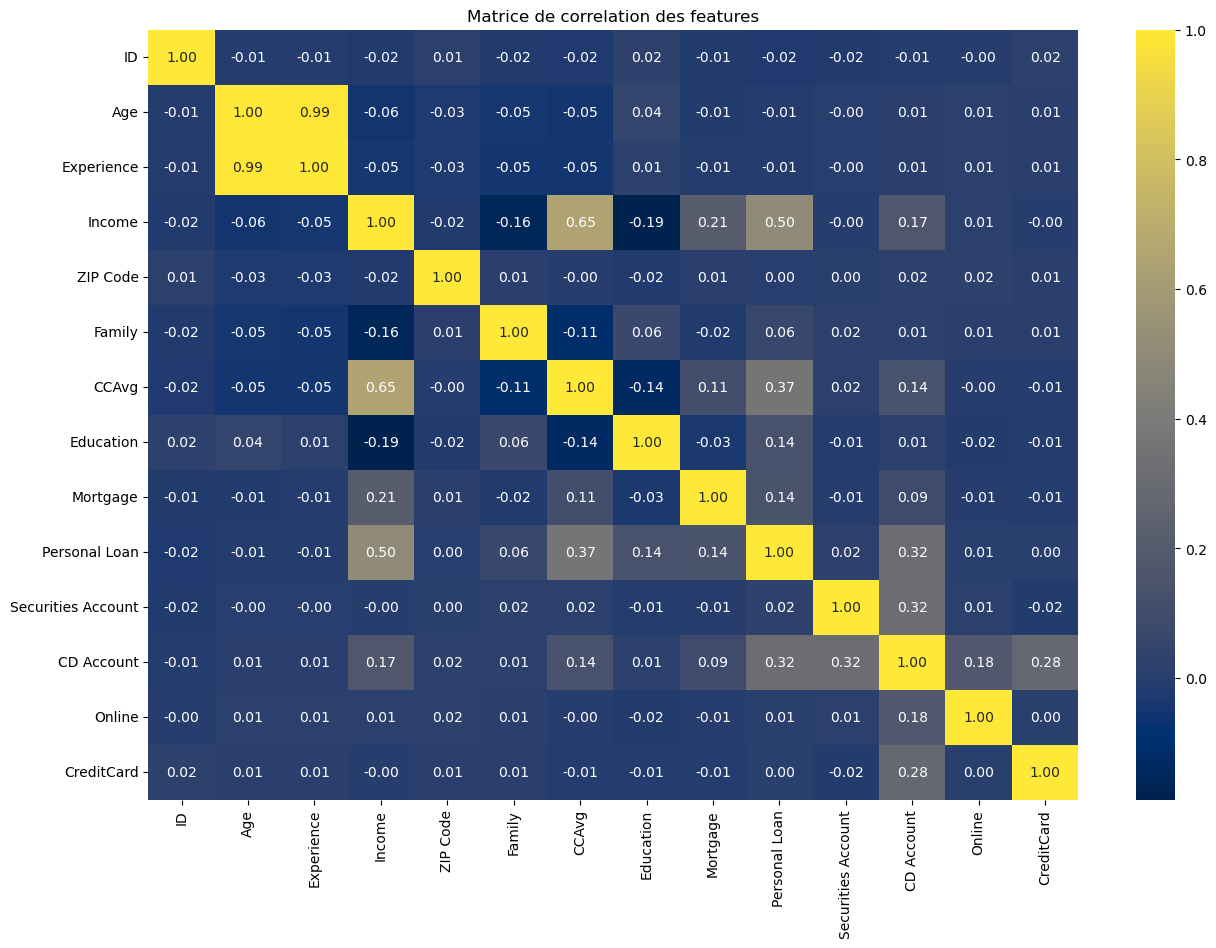

In [45]:
corr = df.corr()
plt.figure(figsize = (15,10))

sns.heatmap(data = corr, fmt = '.2f', cmap = palettes[8], annot = True)
plt.title('Matrice de correlation des features')
plt.show()

## 4.3 Pairplot

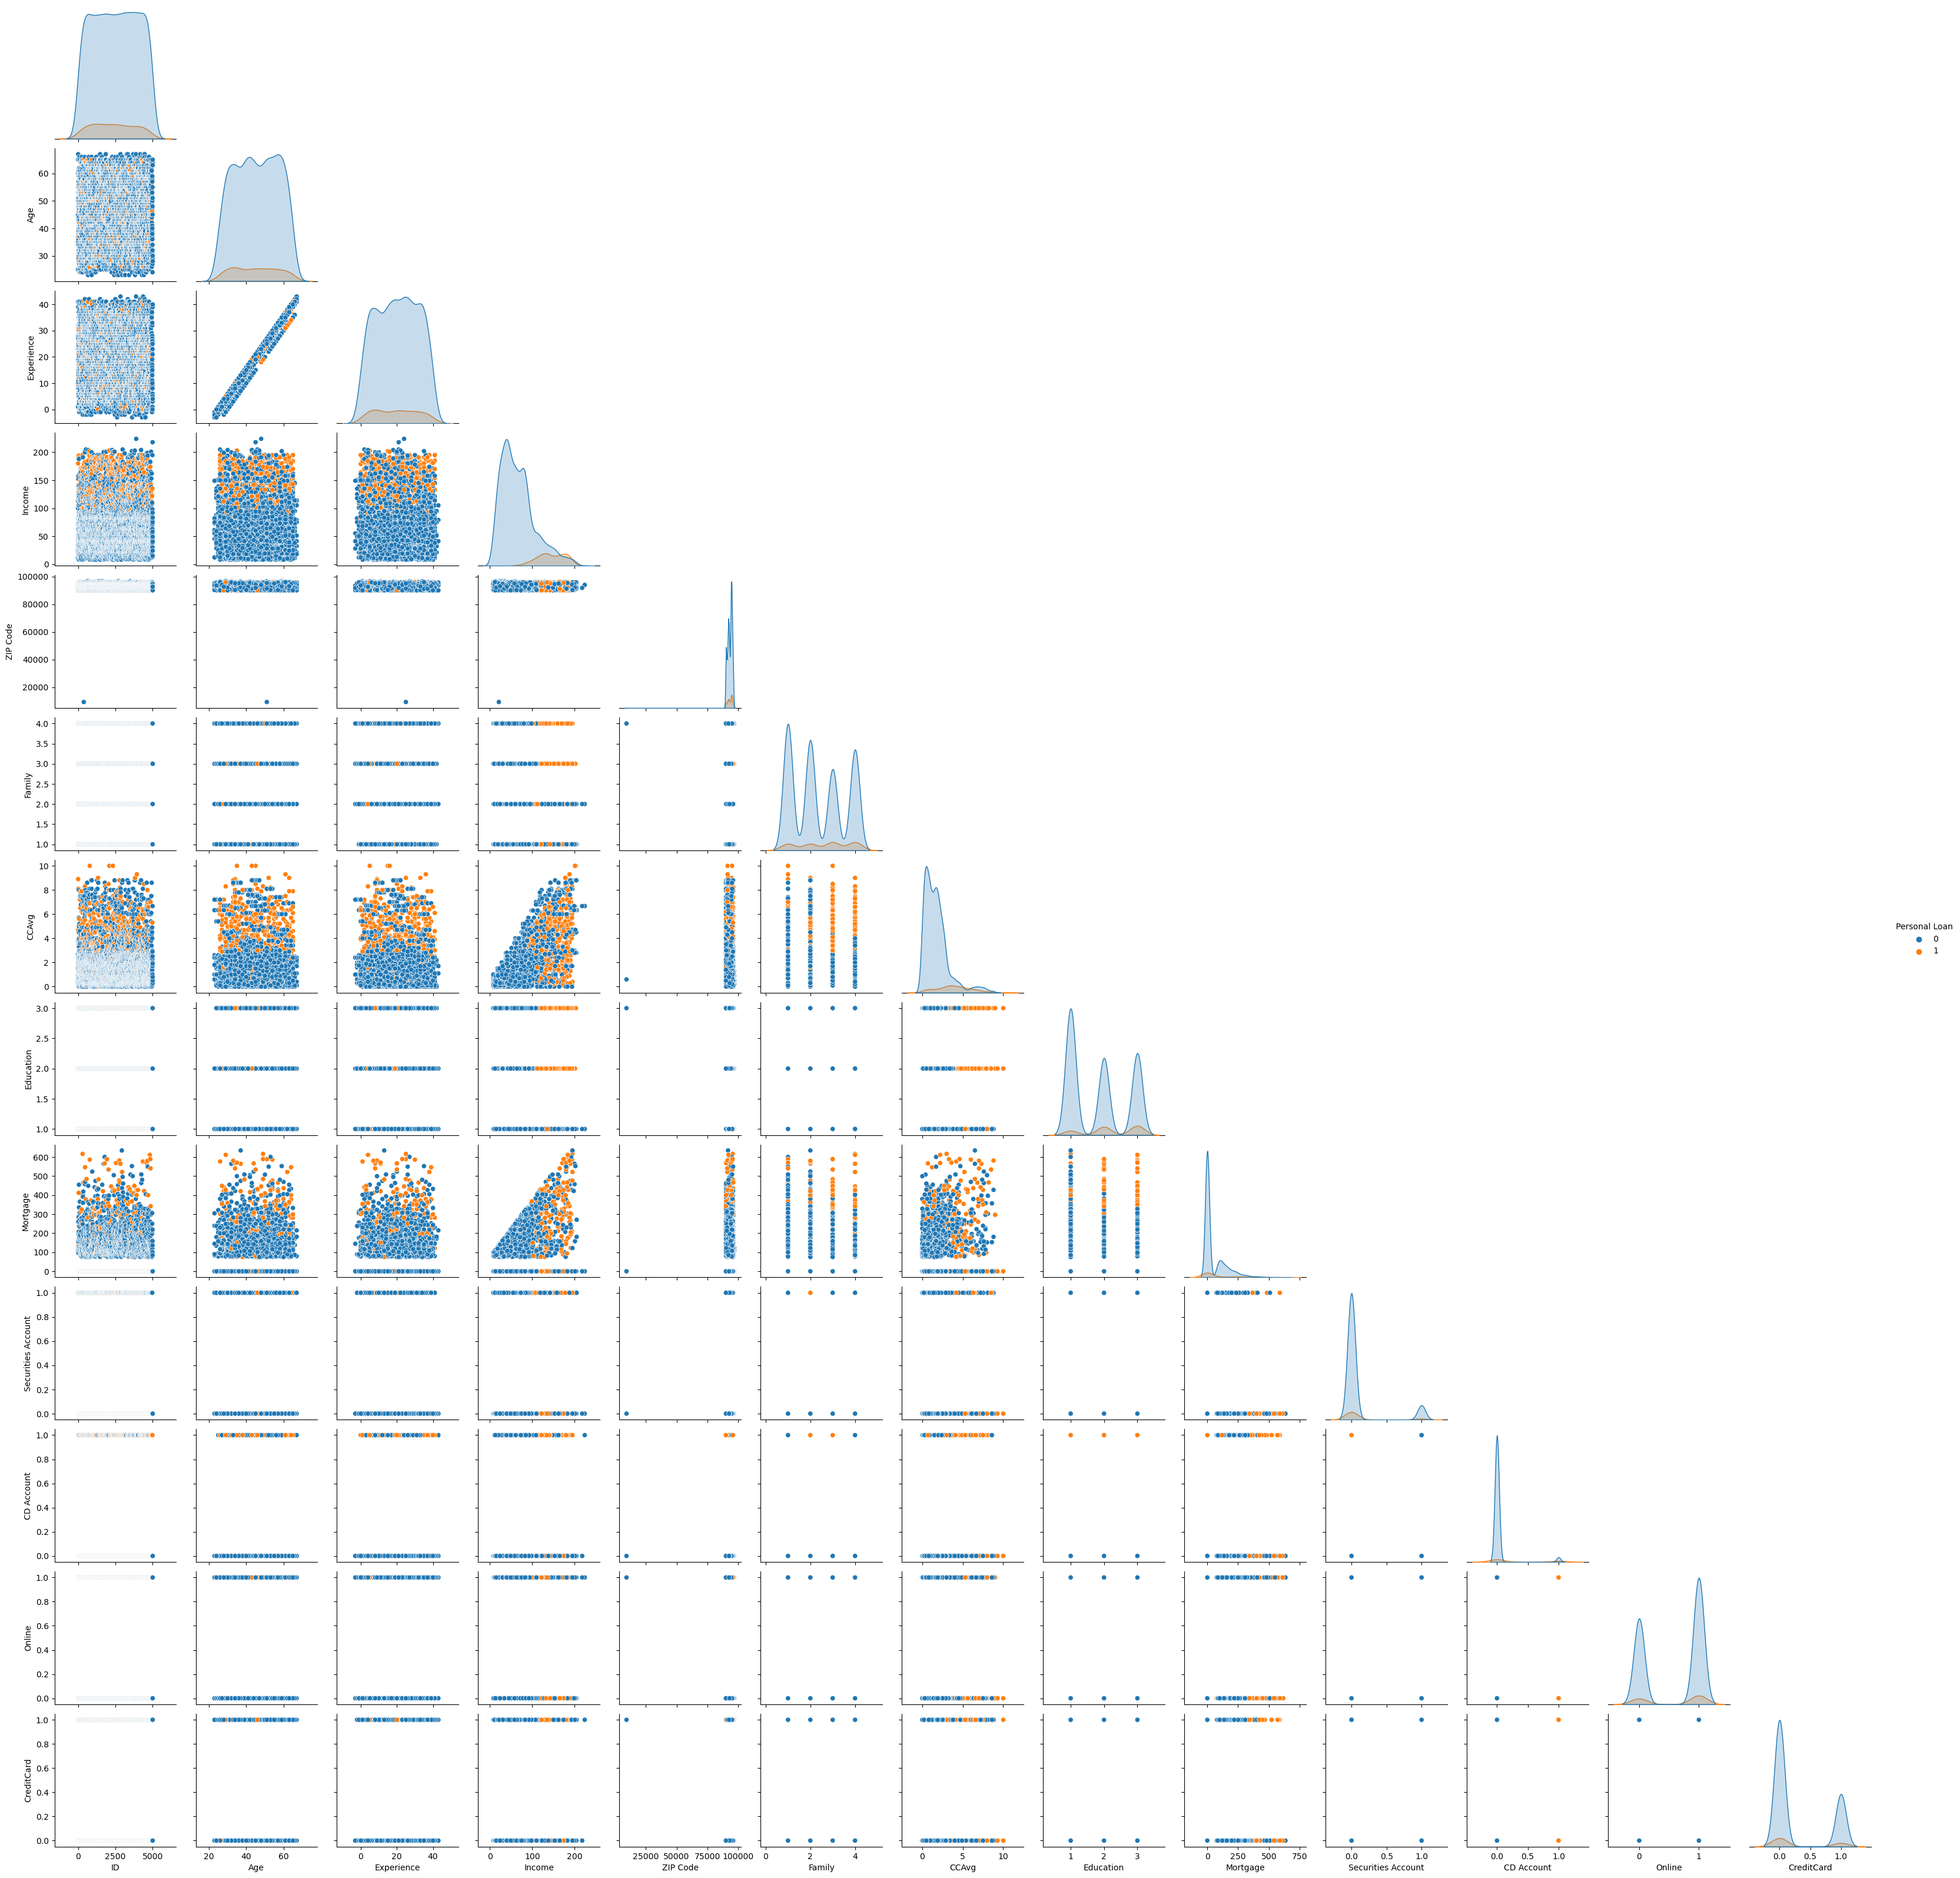

In [46]:

sns.pairplot(df, hue = 'Personal Loan', kind = 'scatter', corner = True, dropna = True)
plt.show()

# Model 

## Agglomérative Hiérarchique : Clustering Distanciel pour Problèmes d'Apprentissage Non Supervisé

L'agglomération hiérarchique est un algorithme de classification non supervisé qui se base sur la distance entre les points de données. Il permet de construire une hiérarchie de clusters en forme d'arbre, également appelée dendrogramme. Cet algorithme procède de manière ascendante, en considérant chaque point comme un cluster initial, puis en fusionnant ces clusters en fonction de leur distance.

Le processus de fusion des clusters se déroule en plusieurs étapes :

1. Chaque point est considéré comme un cluster indépendant.
2. Les clusters les plus proches sont fusionnés en un nouveau cluster.
3. Ce cluster combiné est ensuite comparé aux autres clusters et le plus proche d'entre eux est fusionné.
4. Ce processus se poursuit jusqu'à ce qu'un seul cluster regroupe l'ensemble des points.

Le dendrogramme permet de visualiser l'évolution de la formation des clusters. Pour déterminer le nombre de clusters, on peut identifier le nombre de fusions présentes à l'avant-dernière étape. Plus les lignes verticales sont longues, plus les clusters sont éloignés.

Pour déterminer le nombre de clusters, on peut utiliser différentes méthodes, telles que la méthode de la distance de silhouette ou la méthode de l'angle droit. L'algorithme d'agglomération hiérarchique comporte deux hyperparamètres importants :

* La liaison : il s'agit de la méthode de fusion des clusters. On distingue plusieurs méthodes de liaison, telles que la méthode de liaison simple, de liaison moyenne, de liaison centrale et de liaison complète.
* L'affinité : il s'agit de la formule de distance utilisée pour comparer les clusters avant leur fusion. On distingue plusieurs formules d'affinité, telles que la distance euclidienne, la distance de Manhattan et la distance de Chebyshev.

En résumé, l'agglomération hiérarchique est une méthode de classification non supervisée permettant de regrouper des points de données similaires en fonction de leur distance. Grâce à sa représentation visuelle sous forme de dendrogramme, elle permet de déterminer facilement le nombre de clusters.

In [47]:
df.set_index(keys = 'ID', inplace = True)


In [48]:
df.sample(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
14,59,32,40,94920,4,2.5,2,0,0,0,0,1,0
1163,38,14,112,94501,2,2.2,1,394,0,0,0,0,0
652,28,4,58,92121,3,1.5,1,131,0,0,0,0,0


In [49]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

hierarchical_cluster = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')

labels = hierarchical_cluster.fit(df)

pred_agc = pd.Series(hierarchical_cluster.labels_)

### Evaluation

#### silhouette_score
Le score de silhouette est une mesure d'évaluation d'un clustering qui permet de quantifier la compacité et la séparation des clusters. Il évalue à quel point un échantillon est similaire à son propre cluster (cohésion) par rapport aux autres clusters (séparation).

La fonction `silhouette_score` de scikit-learn prend en entrée deux arguments :

- `X` : La matrice de caractéristiques contenant les points de données.
- `labels` : Les étiquettes de cluster attribuées à chaque point de données par l'algorithme de clustering.

Le score de silhouette d'un échantillon est calculé comme suit :

s = (b - a) \ max(a, b)

où :
- \( a \) est la distance moyenne entre un échantillon et tous les autres points dans le même cluster.
- \( b \) est la distance moyenne entre un échantillon et tous les points dans le cluster le plus proche (différent de celui auquel l'échantillon appartient).

Le score de silhouette pour l'ensemble des données est la moyenne des scores de silhouette de chaque échantillon. Il varie de -1 à 1, où une valeur élevée indique une bonne adéquation de l'objet à son propre cluster et une mauvaise adéquation aux clusters voisins.

In [50]:
from sklearn.metrics import silhouette_score
print(f'silhouette score : {silhouette_score(df, pred_agc)} \n')

silhouette score : 0.6472341422955415 



#### davies_bouldin_score
Le score Davies-Bouldin est une mesure de la similarité moyenne entre chaque cluster et son cluster le plus proche. Il est basé sur la notion que les clusters optimaux devraient être à la fois bien séparés et denses. 

La fonction `davies_bouldin_score` prend les arguments suivants :

- `X` : La matrice de caractéristiques contenant les points de données.
- `labels` : Les étiquettes de cluster attribuées à chaque point de données par l'algorithme de clustering.

Le score Davies-Bouldin est calculé comme la moyenne du coefficient de Davies-Bouldin de chaque cluster. Le coefficient de Davies-Bouldin pour un cluster est la moyenne des similarités entre ce cluster et tous les autres clusters, où la similarité est mesurée en termes de la distance intra-cluster et de la distance inter-cluster. Un score plus faible indique une meilleure séparation entre les clusters.

In [51]:
from sklearn.metrics import davies_bouldin_score 
print(f'davies bouldin score :{davies_bouldin_score(df, pred_agc)} \n')

davies bouldin score :0.4754896615597222 



#### calinsky_harabasz_score
Le score de Calinski-Harabasz est une mesure de la compacité et de la séparation entre les clusters. Il est basé sur le rapport entre la dispersion inter-cluster et la dispersion intra-cluster. 

La fonction `calinski_harabasz_score` prend les arguments suivants :

- `X` : La matrice de caractéristiques contenant les points de données.
- `labels` : Les étiquettes de cluster attribuées à chaque point de données par l'algorithme de clustering.

Le score de Calinski-Harabasz est calculé en comparant la variance inter-clusters avec la variance intra-cluster. Un score plus élevé indique une meilleure séparation entre les clusters.

In [52]:
from sklearn.metrics import calinski_harabasz_score
print(f'calinski harabasz score : {calinski_harabasz_score(df, pred_agc)} \n')

calinski harabasz score : 5644.663456567666 



#### Indice Rand ajusté
L'indice de Rand ajusté est une métrique d'évaluation utilisée pour mesurer la similarité entre deux clustering en considérant toutes les paires des `n_samples` et en calculant les paires de comptage des éléments assignés dans les mêmes ou différents clusters dans le clustering réel et prédit.

Le score de l'indice de Rand ajusté est défini comme suit :

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

Dans cette formule :

- RI est l'indice de Rand brut, qui mesure la similarité entre les clustering en comptant le nombre de paires d'éléments correctement ou incorrectement assignés dans les deux clustering.
- RIattendu est l'indice de Rand attendu, calculé sous l'hypothèse nulle d'indépendance entre les clustering réel et prédit.

L'ARI prend des valeurs dans l'intervalle [-1, 1]. Une valeur proche de 1 indique une concordance parfaite entre les deux clustering, tandis qu'une valeur proche de 0 indique une concordance aléatoire et une valeur négative indique une discordance entre les clustering.

### Standarisation et normalisation

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmaxscaler = MinMaxScaler()

data = df.copy()

data = scaler.fit_transform(data)
model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
model.fit(data)

data1 = df.copy()
data1 = minmaxscaler.fit_transform(data)
model1 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
model1.fit(data)

print(
    f""" 
    
     {'-'*15} Data original {'-'*15} \n
    silhouette_score : {silhouette_score(df, pred_agc)}
    davies_bouldin_score : {davies_bouldin_score(df,pred_agc)}
    calinski harabasz score : {calinski_harabasz_score(df, pred_agc)}
    
    {'-'*15} Data standarise {'-'*15} \n
    silhouette_score : {silhouette_score(data, model.labels_)}
    davies_bouldin_score : {davies_bouldin_score(data, model.labels_)}
    calinski harabasz score : {calinski_harabasz_score(data, model.labels_)}
    
     {'-'*15} Data normalise {'-'*15} \n
    silhouette_score : {silhouette_score(data1, model1.labels_)}
    davies_bouldin_score : {davies_bouldin_score(data1, model1.labels_)}
    calinski harabasz score : {calinski_harabasz_score(data1, model1.labels_)}
    """)



 
    
     --------------- Data original --------------- 

    silhouette_score : 0.6472341422955415
    davies_bouldin_score : 0.4754896615597222
    calinski harabasz score : 5644.663456567666
    
    --------------- Data standarise --------------- 

    silhouette_score : 0.22277898621223863
    davies_bouldin_score : 2.525078742294248
    calinski harabasz score : 619.9661815662056
    
     --------------- Data normalise --------------- 

    silhouette_score : 0.14801587502904626
    davies_bouldin_score : 3.2528118788615217
    calinski harabasz score : 362.0426894632659
    


### Optimisation 

In [54]:
clusters = range(2,21)

silhouetteScore = np.zeros(len(clusters))
daviesBouldinScore = np.zeros(len(clusters))
calinskyHarabaszScore = np.zeros(len(clusters))

for cluster in clusters:
    model = AgglomerativeClustering(n_clusters=cluster, linkage = 'ward', affinity = 'euclidean')
    model.fit(df)
    silhouetteScore[cluster-2] = silhouette_score(df, model.labels_)
    daviesBouldinScore[cluster-2] = davies_bouldin_score(df, model.labels_)    
    calinskyHarabaszScore[cluster-2] = calinski_harabasz_score(df, model.labels_) 

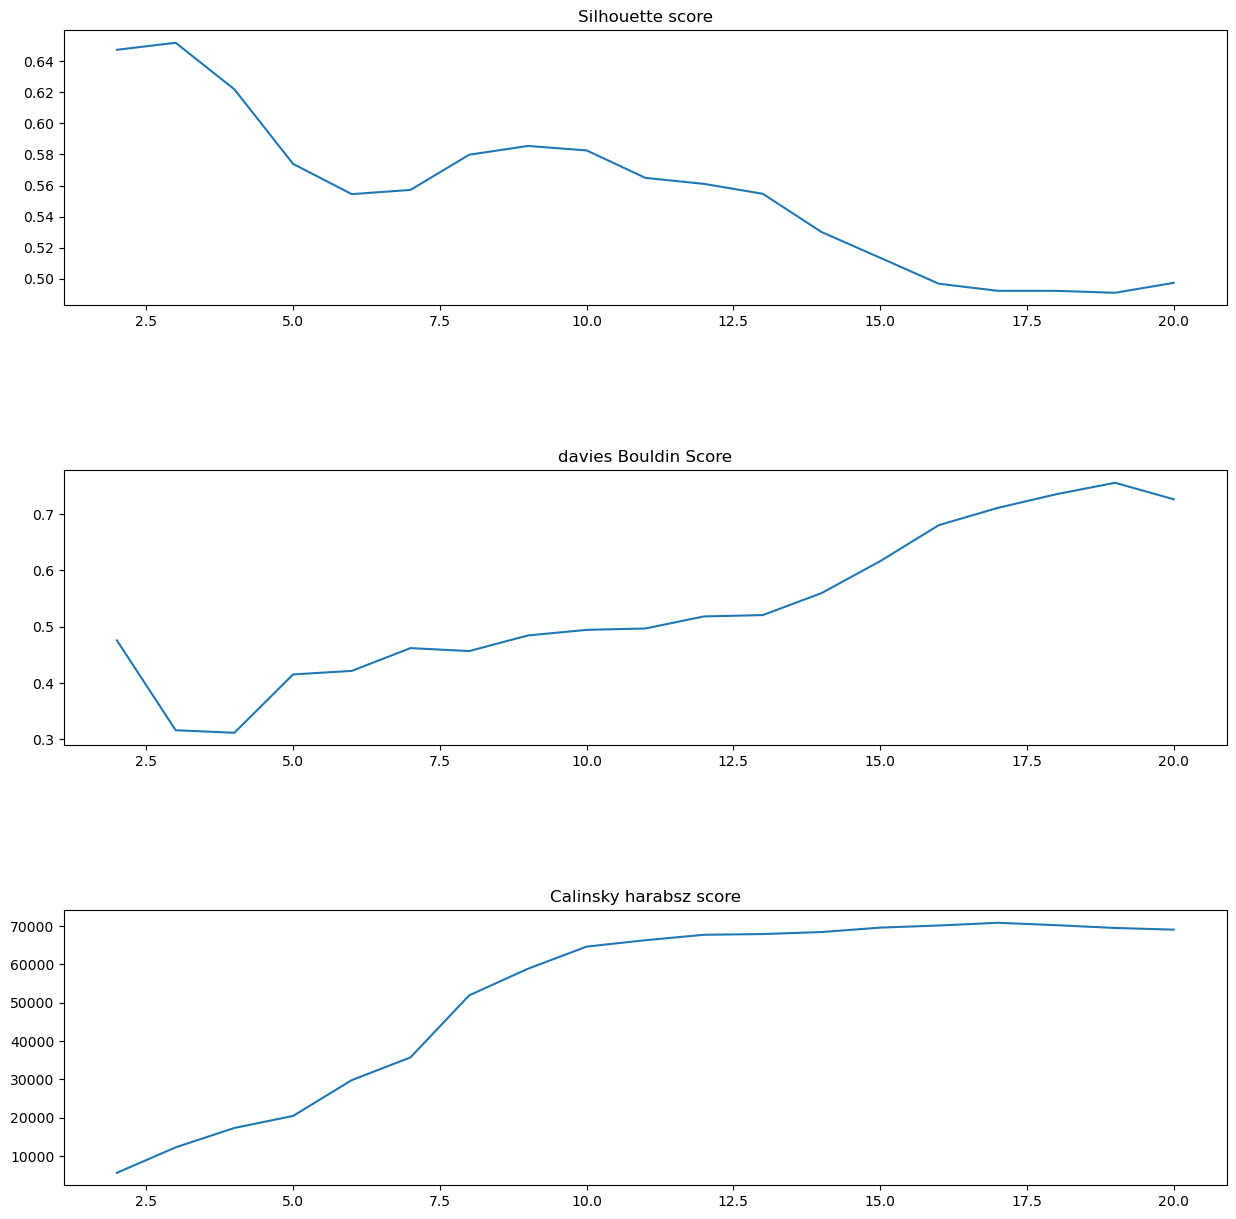

In [55]:
plt.figure(figsize = (15,15))
plt.subplots_adjust(hspace=0.6)

plt.subplot(3,1,1)
plt.title('Silhouette score')
sns.lineplot(x = range(2,21), y = silhouetteScore)
plt.xticks(range(1,25))

plt.subplot(3,1,2)
plt.title('davies Bouldin Score')
sns.lineplot(x = range(2,21), y = daviesBouldinScore)
plt.xticks(range(1,25))

plt.subplot(3,1,3)
plt.title('Calinsky harabsz score')
sns.lineplot(x = range(2,21), y = calinskyHarabaszScore)
plt.xticks(range(1,25))

plt.show()

### GridSearchCV

### scipy.cluster.hierarchy.linkage

#### Liaison simple :

En agglomération hiérarchique, la liaison simple est une méthode pour définir la distance entre deux clusters. Dans cette méthode, la distance entre deux clusters est définie comme la distance minimale entre deux points de chacun des clusters. Autrement dit, deux clusters sont considérés comme proches s'il existe au moins deux points appartenant à chaque cluster qui sont proches l'un de l'autre.

Par exemple, dans l'image ci-dessus, la distance entre les clusters "r" et "s" est égale à la longueur de la flèche entre les deux points les plus proches de ces clusters.

En résumé, la liaison simple est une méthode de définition de la distance entre deux clusters dans l'agglomération hiérarchique, où la distance entre deux clusters est définie comme la distance minimale entre deux points appartenant à chaque cluster.

![Exemple de liaison simple](https://media.geeksforgeeks.org/wp-content/uploads/20190718124314/single2.png)


In [56]:
df_scaled = scaler.fit_transform(df) 

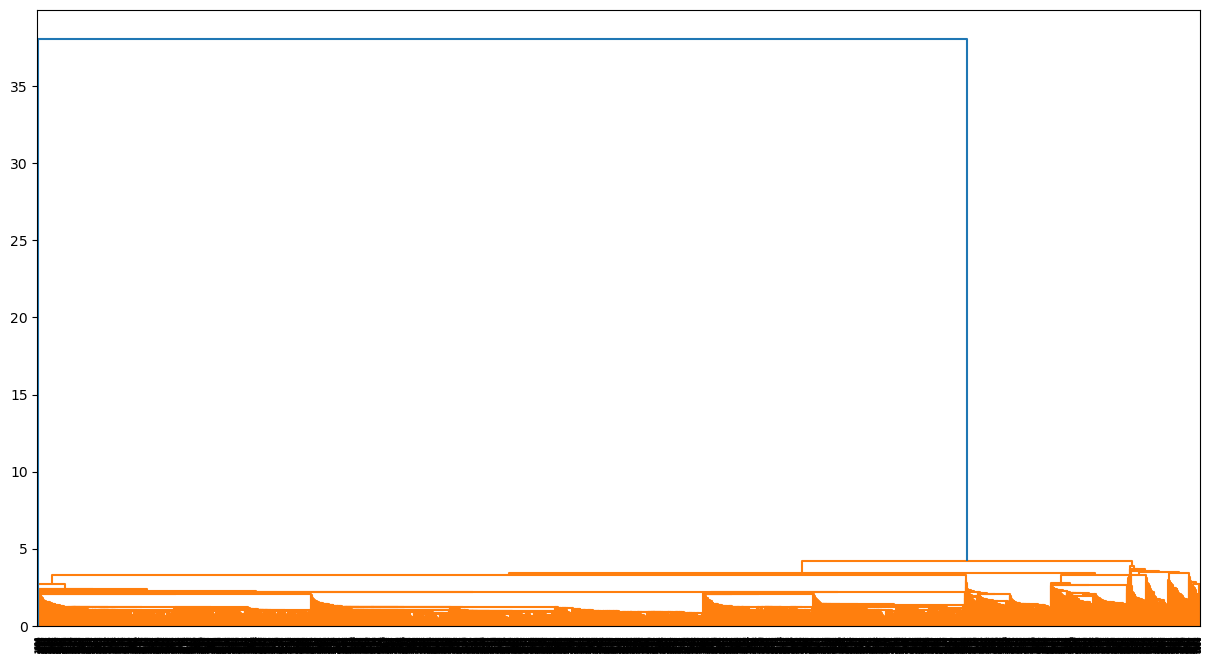

In [57]:
plt.figure(figsize = (15,8))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Liaison complète :

En liaison complète, la distance entre deux clusters est définie comme la distance maximale entre deux points appartenant à chaque cluster. Cette méthode privilégie la distance maximale entre tous les points des deux clusters pour mesurer leur similarité. Concrètement, pour chaque point du premier cluster, on calcule sa distance à tous les points du second cluster, puis on retient la distance maximale parmi ces distances. On répète ce processus pour tous les points des deux clusters et on retient finalement la distance maximale obtenue. 

Cela se traduit graphiquement par la longueur de la flèche entre les deux points les plus éloignés de chaque cluster, comme illustré dans l'exemple suivant :

![Complete Linkage Example](https://media.geeksforgeeks.org/wp-content/uploads/20190719093711/complete5.png)

Dans cet exemple, la distance entre les clusters "r" et "s" est représentée par la longueur de la flèche entre les deux points les plus éloignés de ces clusters.

La liaison complète est souvent utilisée lorsque l'on souhaite détecter des clusters compacts et bien séparés, car elle favorise la similarité maximale entre les clusters.


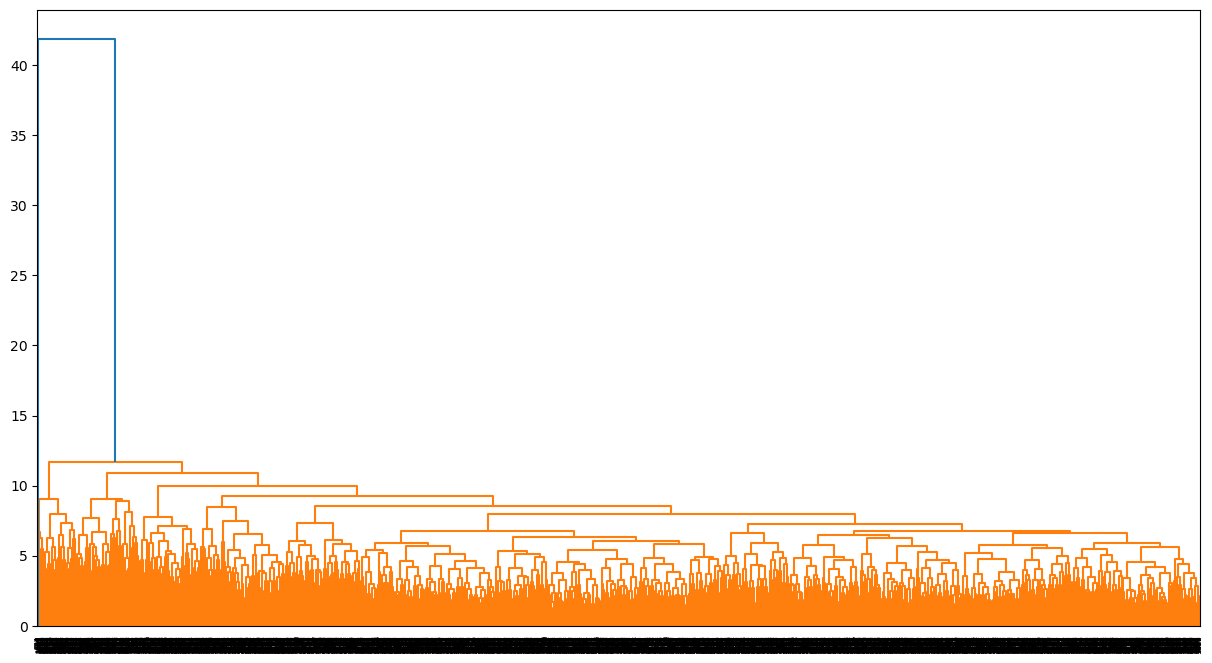

In [58]:
plt.figure(figsize = (15,8))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Liaison moyenne :

En agglomération hiérarchique, la liaison moyenne (ou average linkage) est une méthode de définition de la distance entre deux clusters. Dans cette méthode, la distance entre deux clusters est définie comme la distance moyenne entre chaque point de l'un des clusters et tous les points de l'autre cluster. Plus précisément, pour chaque point du premier cluster, on calcule sa distance à tous les points du second cluster, puis on fait la moyenne de ces distances. On répète le processus en inversant les rôles des deux clusters, et on prend la moyenne des deux distances moyennes obtenues. Ce processus est illustré dans l'exemple suivant :

![Average Linkage Example](https://media.geeksforgeeks.org/wp-content/uploads/20190718124307/average1.png)

Dans cet exemple, on a deux clusters "r" et "s". Pour calculer la distance entre ces deux clusters, on calcule d'abord la distance entre chaque point du cluster "r" et chaque point du cluster "s". Par exemple, la distance entre les points "r1" et "s1" est égale à 3, la distance entre les points "r1" et "s2" est égale à 5, etc. On fait la moyenne de ces distances pour obtenir la distance moyenne entre le point "r1" et le cluster "s". On répète le processus pour chaque point du cluster "r" et on fait la moyenne des distances moyennes obtenues pour obtenir la distance moyenne entre les deux clusters "r" et "s".


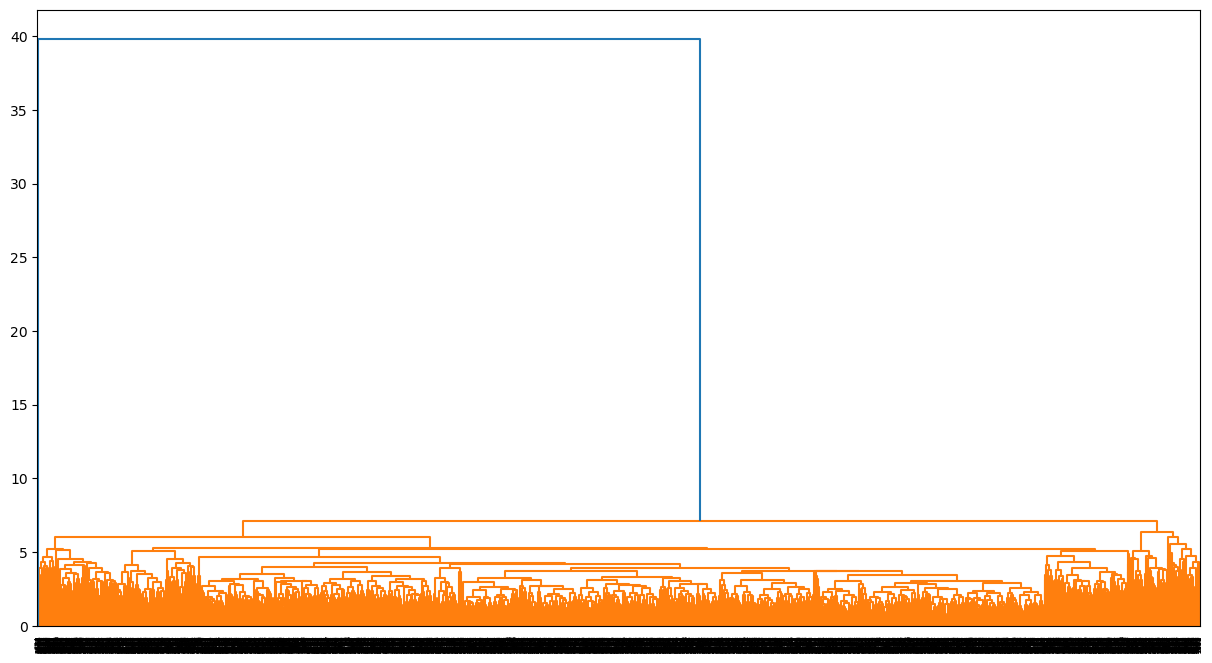

In [59]:
plt.figure(figsize = (15,8))

mergings = linkage(df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()


### La découpe du dendrogramme selon K
La découpe du dendrogramme basée sur K consiste à segmenter l'arbre hiérarchique en K clusters distincts. Cela permet de déterminer le nombre optimal de clusters dans un ensemble de données non étiquetées.

Pour optimiser le modèle, nous devons choisir judicieusement la valeur de K. Cela peut être fait en examinant la structure du dendrogramme et en identifiant le point de coupure où les clusters commencent à se diviser de manière significative. Une approche courante consiste à utiliser des mesures telles que le coefficient de silhouette ou la somme des carrés des erreurs (SSE) pour évaluer la qualité des clusters pour différentes valeurs de K.

Le choix de K est crucial car il influence la structure et l'interprétation des clusters résultants. Un K trop petit peut regrouper des points qui ne sont pas intrinsèquement similaires, tandis qu'un K trop grand peut diviser des clusters cohérents en sous-groupes insignifiants. Par conséquent, il est essentiel de sélectionner une valeur appropriée de K qui capture correctement la structure sous-jacente des données.

L'importance de K réside dans sa capacité à fournir des insights significatifs sur la structure intrinsèque des données. En identifiant le nombre optimal de clusters, nous pouvons mieux comprendre les relations entre les observations et les sous-groupes qui existent potentiellement dans les données. Cela facilite également la prise de décision dans divers domaines, tels que le marketing, la segmentation client, la détection d'anomalies et bien d'autres encore. Ainsi, choisir le bon K est essentiel pour obtenir des résultats précis et significatifs lors de l'analyse des clusters.

In [60]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
data = df.copy()
data['cluster'] = cluster_labels
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,cluster
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0


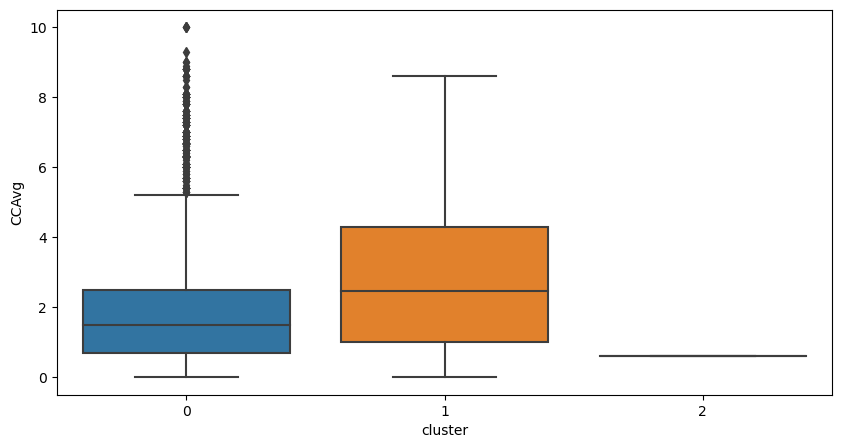

In [74]:
plt.figure(figsize = (10,5))
sns.boxplot(x='cluster', y='CCAvg', data=data)
plt.show()